## EDA + Feature Engineering

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data_mechademy.csv")

In [3]:
df.sample(10)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
14399,2016-04-20 07:00:00,-944.5664110012307,0.0,21.0,38.1633333333333,17.89,42.100000,6.543921,36.560000,21.200000,...,19.890000,39.860000,1.900000,767.900000,93.000000,1.000000,27.0,0.800000,31.756444,31.756444
5371,2016-02-17 21:30:00,90.0,0.0,21.39,34.23,19.9266666666667,34.860000,20.225714,35.621429,18.823333,...,18.100000,39.466667,0.450000,755.800000,89.000000,1.500000,62.0,NaN,15.974480,15.974480
16826,2016-05-07 01:20:00,60.0,0.0,24.1,38.0,22.29,38.863333,24.500000,37.790000,NaN,...,21.700000,42.626667,12.800000,752.500000,70.666667,2.666667,40.0,7.300000,0.571300,0.571300
13352,2016-04-13 01:40:00,60.0,0.0,22.29,41.6266666666667,2.9881989040997503,44.200000,24.500000,39.900000,22.790000,...,20.926667,42.090000,7.800000,751.400000,84.666667,2.000000,40.0,5.333333,19.275718,19.275718
15835,2016-04-30 05:30:00,50.0,0.0,21.5,37.1633333333333,18.7,40.326667,22.890000,37.200000,19.390000,...,19.100000,41.126667,4.900000,757.250000,95.500000,1.000000,40.0,4.250000,47.350710,47.350710
16090,2016-05-01 23:50:00,50.0,NaN,22.2,35.09,19.5,36.966667,22.200000,35.700000,20.890000,...,19.600000,38.363333,6.433333,766.000000,68.833333,1.166667,40.0,1.016667,37.581522,37.581522
328,2016-01-13 23:50:00,40.0,0.0,19.29,42.09,18.7,41.400000,20.390000,43.760000,18.823333,...,4.476511,42.863333,2.866667,755.566667,88.500000,5.166667,NaN,1.166667,38.107576,38.107576
1950,2016-01-25 04:50:00,40.0,0.0,20.5,42.79,19.39,42.933333,20.533333,44.900000,17.600000,...,16.500000,51.090000,7.650000,NaN,96.500000,3.000000,61.5,7.083333,3.933875,3.933875
814,2016-01-17 08:00:00,380.0,10.0,20.79,41.2,20.0,39.663333,NaN,42.400000,21.360000,...,17.856667,45.760000,-0.800000,764.700000,96.000000,2.000000,24.0,-1.400000,17.679290,NaN
8104,2016-03-07 18:10:00,70.0,0.0,21.2,37.95,19.5,37.863333,22.133333,36.000000,4.613485,...,17.790000,37.030000,3.150000,750.550000,88.166667,1.833333,40.0,1.350000,45.451690,45.451690


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [5]:
# Converting all columns except 'timestamp' to numeric if they are objects
for col in df.columns:
    if df[col].dtype == 'object' and col != 'timestamp':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Confirm changes
print(df.dtypes[df.dtypes == 'object'])  # should only show 'timestamp'


timestamp    object
dtype: object


In [6]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Extracting features from timestamp
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek  # Monday = 0, Sunday = 6
df['is_weekend'] = df['dayofweek'].isin([5, 6])  # Saturday or Sunday
df['minutes'] = df['timestamp'].dt.minute
df['month'] = df['timestamp'].dt.month

In [7]:
df['is_weekend'] = df['is_weekend'].replace({True:1, False:0}) #encoding this into binary values(0,1)

In [8]:
zone_columns = [f'zone{i}_humidity' for i in range(1, 10)]
df[zone_columns] = df[zone_columns] / 100

In [9]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [10]:
# checking if these two variables have equal values, if they have same then we'll remove one column.
check_random = (df['random_variable1'] == df['random_variable2'] ) | df['random_variable1'].isna()&df['random_variable2']

In [11]:

df.loc[~check_random,['random_variable1','random_variable2']]


,random_variable1,random_variable2
5,44.919484,NaN
11,8.827838,NaN
13,19.205186,NaN
31,29.978291,-120.409590
49,34.636578,170.329617
...,...,...
16815,12.438761,NaN
16829,-120.170177,8.705075
16832,-120.170177,34.468621
16849,49.283244,NaN


In [12]:
check_random.value_counts()

True     15379
False     1478
Name: count, dtype: int64

In [13]:
df.isna().any()

timestamp                       False
equipment_energy_consumption     True
lighting_energy                  True
zone1_temperature                True
zone1_humidity                   True
zone2_temperature                True
zone2_humidity                   True
zone3_temperature                True
zone3_humidity                   True
zone4_temperature                True
zone4_humidity                   True
zone5_temperature                True
zone5_humidity                   True
zone6_temperature                True
zone6_humidity                   True
zone7_temperature                True
zone7_humidity                   True
zone8_temperature                True
zone8_humidity                   True
zone9_temperature                True
zone9_humidity                   True
outdoor_temperature              True
atmospheric_pressure             True
outdoor_humidity                 True
wind_speed                       True
visibility_index                 True
dew_point   

In [14]:
df.shape

(16857, 34)

In [15]:
df = df.dropna(subset=['equipment_energy_consumption'])
print(df.shape)

(15945, 34)


In [16]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption      0
lighting_energy                 806
zone1_temperature               891
zone1_humidity                  843
zone2_temperature               876
zone2_humidity                  823
zone3_temperature               757
zone3_humidity                  818
zone4_temperature               771
zone4_humidity                  739
zone5_temperature               786
zone5_humidity                  749
zone6_temperature               799
zone6_humidity                  796
zone7_temperature               738
zone7_humidity                  765
zone8_temperature               801
zone8_humidity                  742
zone9_temperature               728
zone9_humidity                  832
outdoor_temperature             766
atmospheric_pressure            796
outdoor_humidity                757
wind_speed                      779
visibility_index                768
dew_point                       768
random_variable1            

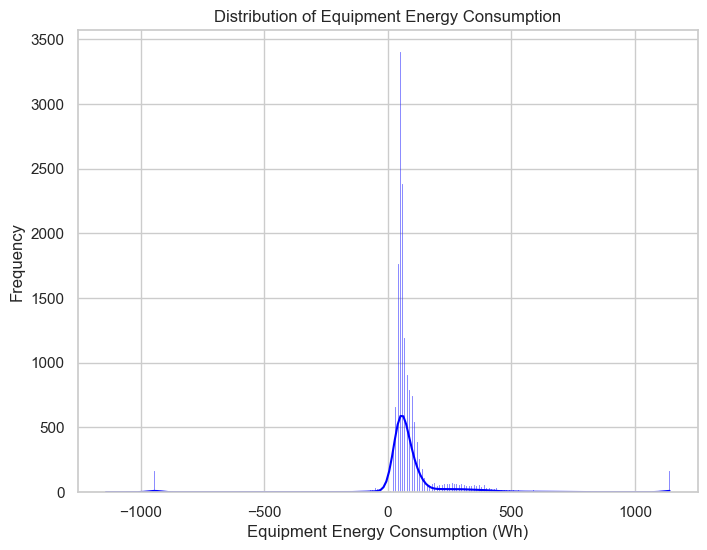

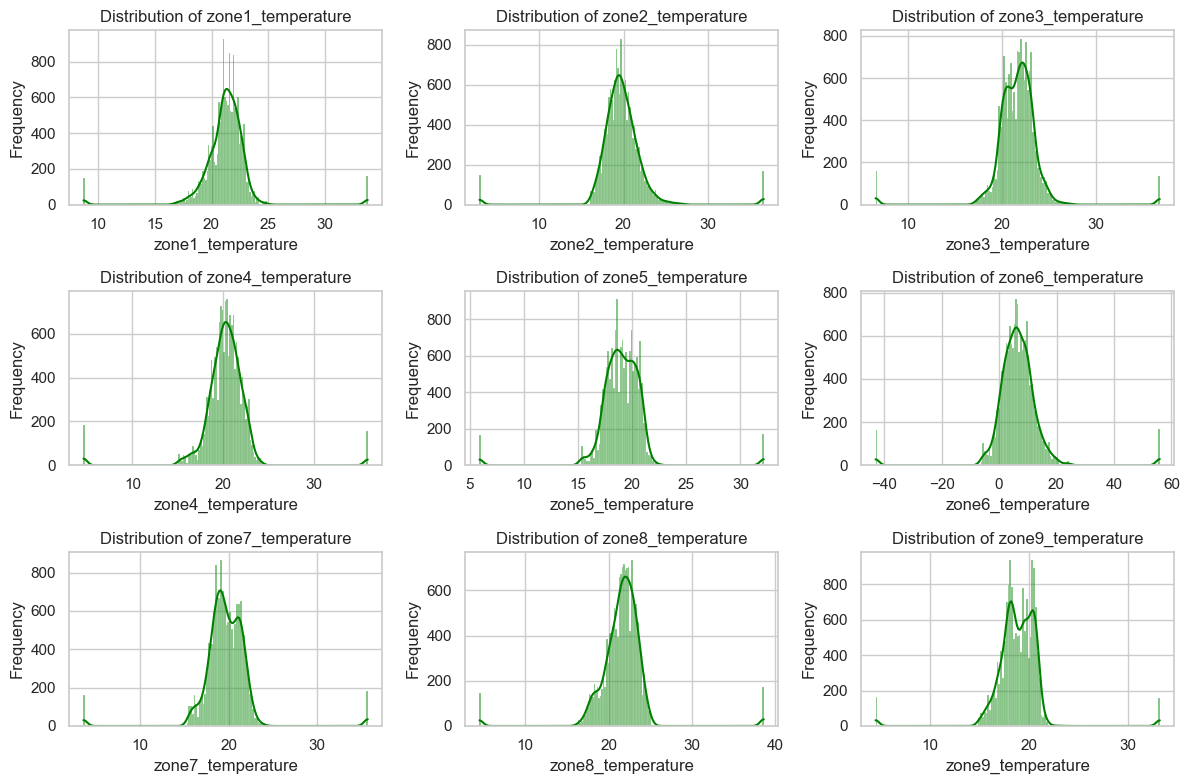

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# Plot the distribution of the target variable (equipment_energy_consumption)
plt.figure(figsize=(8, 6))
sns.histplot(df['equipment_energy_consumption'], kde=True, color='blue')
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Equipment Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of temperature columns
temperature_columns = ['zone1_temperature', 'zone2_temperature', 'zone3_temperature', 
                       'zone4_temperature', 'zone5_temperature', 'zone6_temperature',
                       'zone7_temperature', 'zone8_temperature', 'zone9_temperature']

plt.figure(figsize=(12, 8))
for i, col in enumerate(temperature_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<Axes: xlabel='hour'>

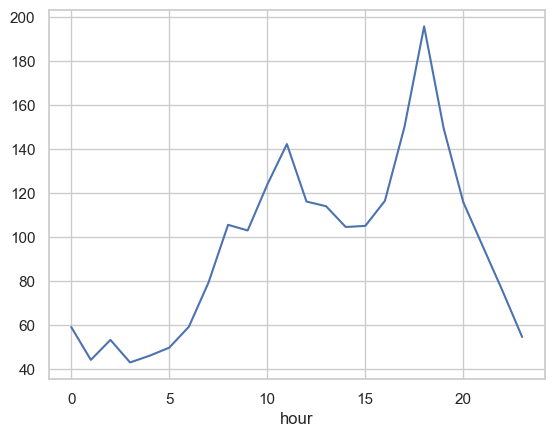

In [18]:
df.groupby('hour')['equipment_energy_consumption'].mean().plot(kind='line')



<Axes: xlabel='dayofweek'>

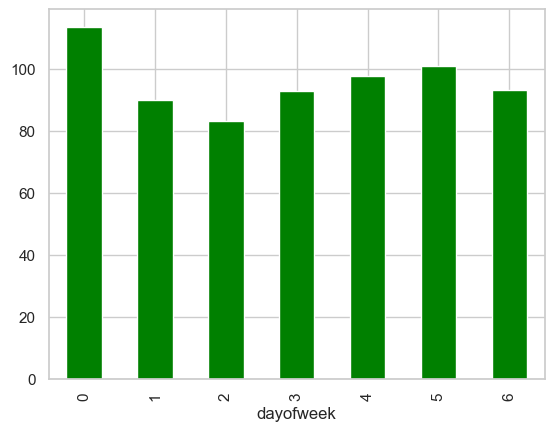

In [19]:
df.groupby('dayofweek')['equipment_energy_consumption'].mean().plot(kind='bar', color = 'green')


<Axes: xlabel='is_weekend'>

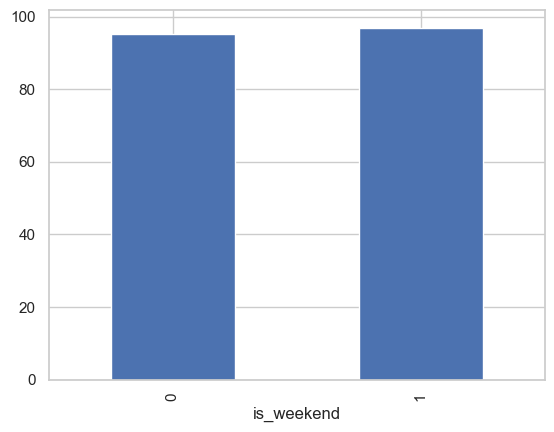

In [20]:
df.groupby('is_weekend')['equipment_energy_consumption'].mean().plot(kind='bar')


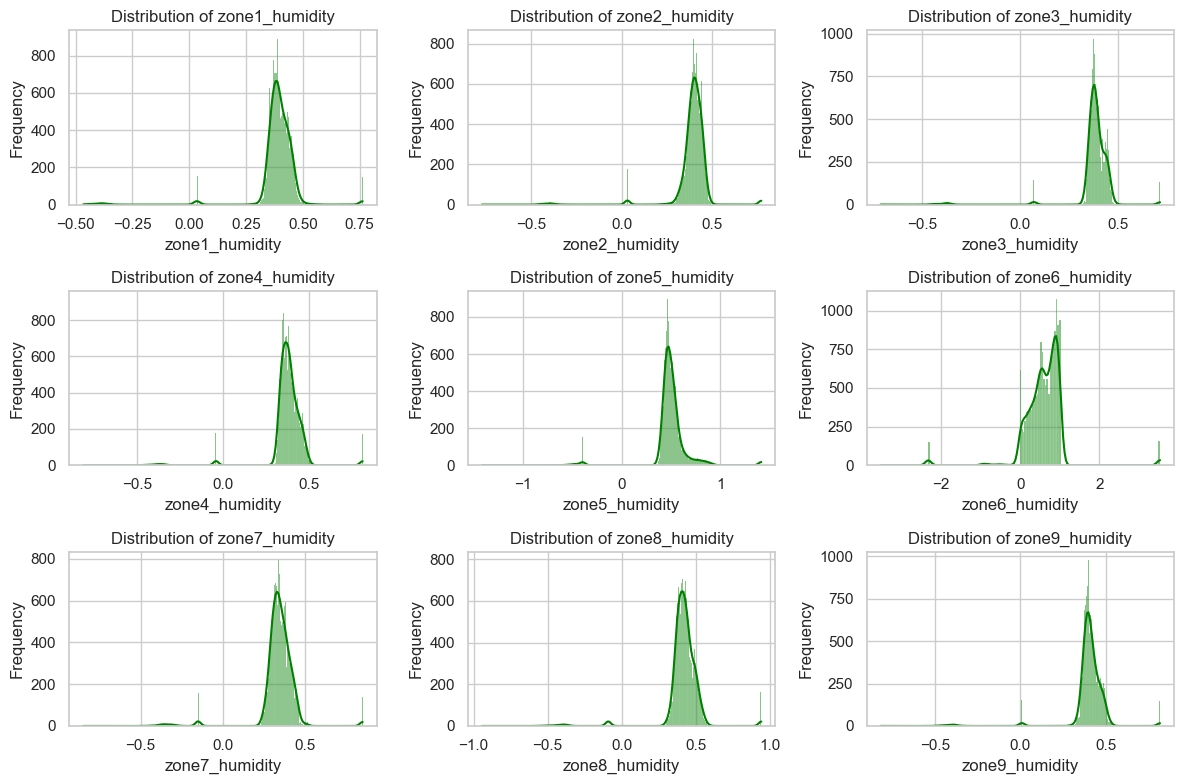

In [21]:
# Plot the distribution of humidity columns
humidity_columns = ['zone1_humidity', 'zone2_humidity', 'zone3_humidity', 
                       'zone4_humidity', 'zone5_humidity', 'zone6_humidity',
                       'zone7_humidity', 'zone8_humidity', 'zone9_humidity']

plt.figure(figsize=(12, 8))
for i, col in enumerate(humidity_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

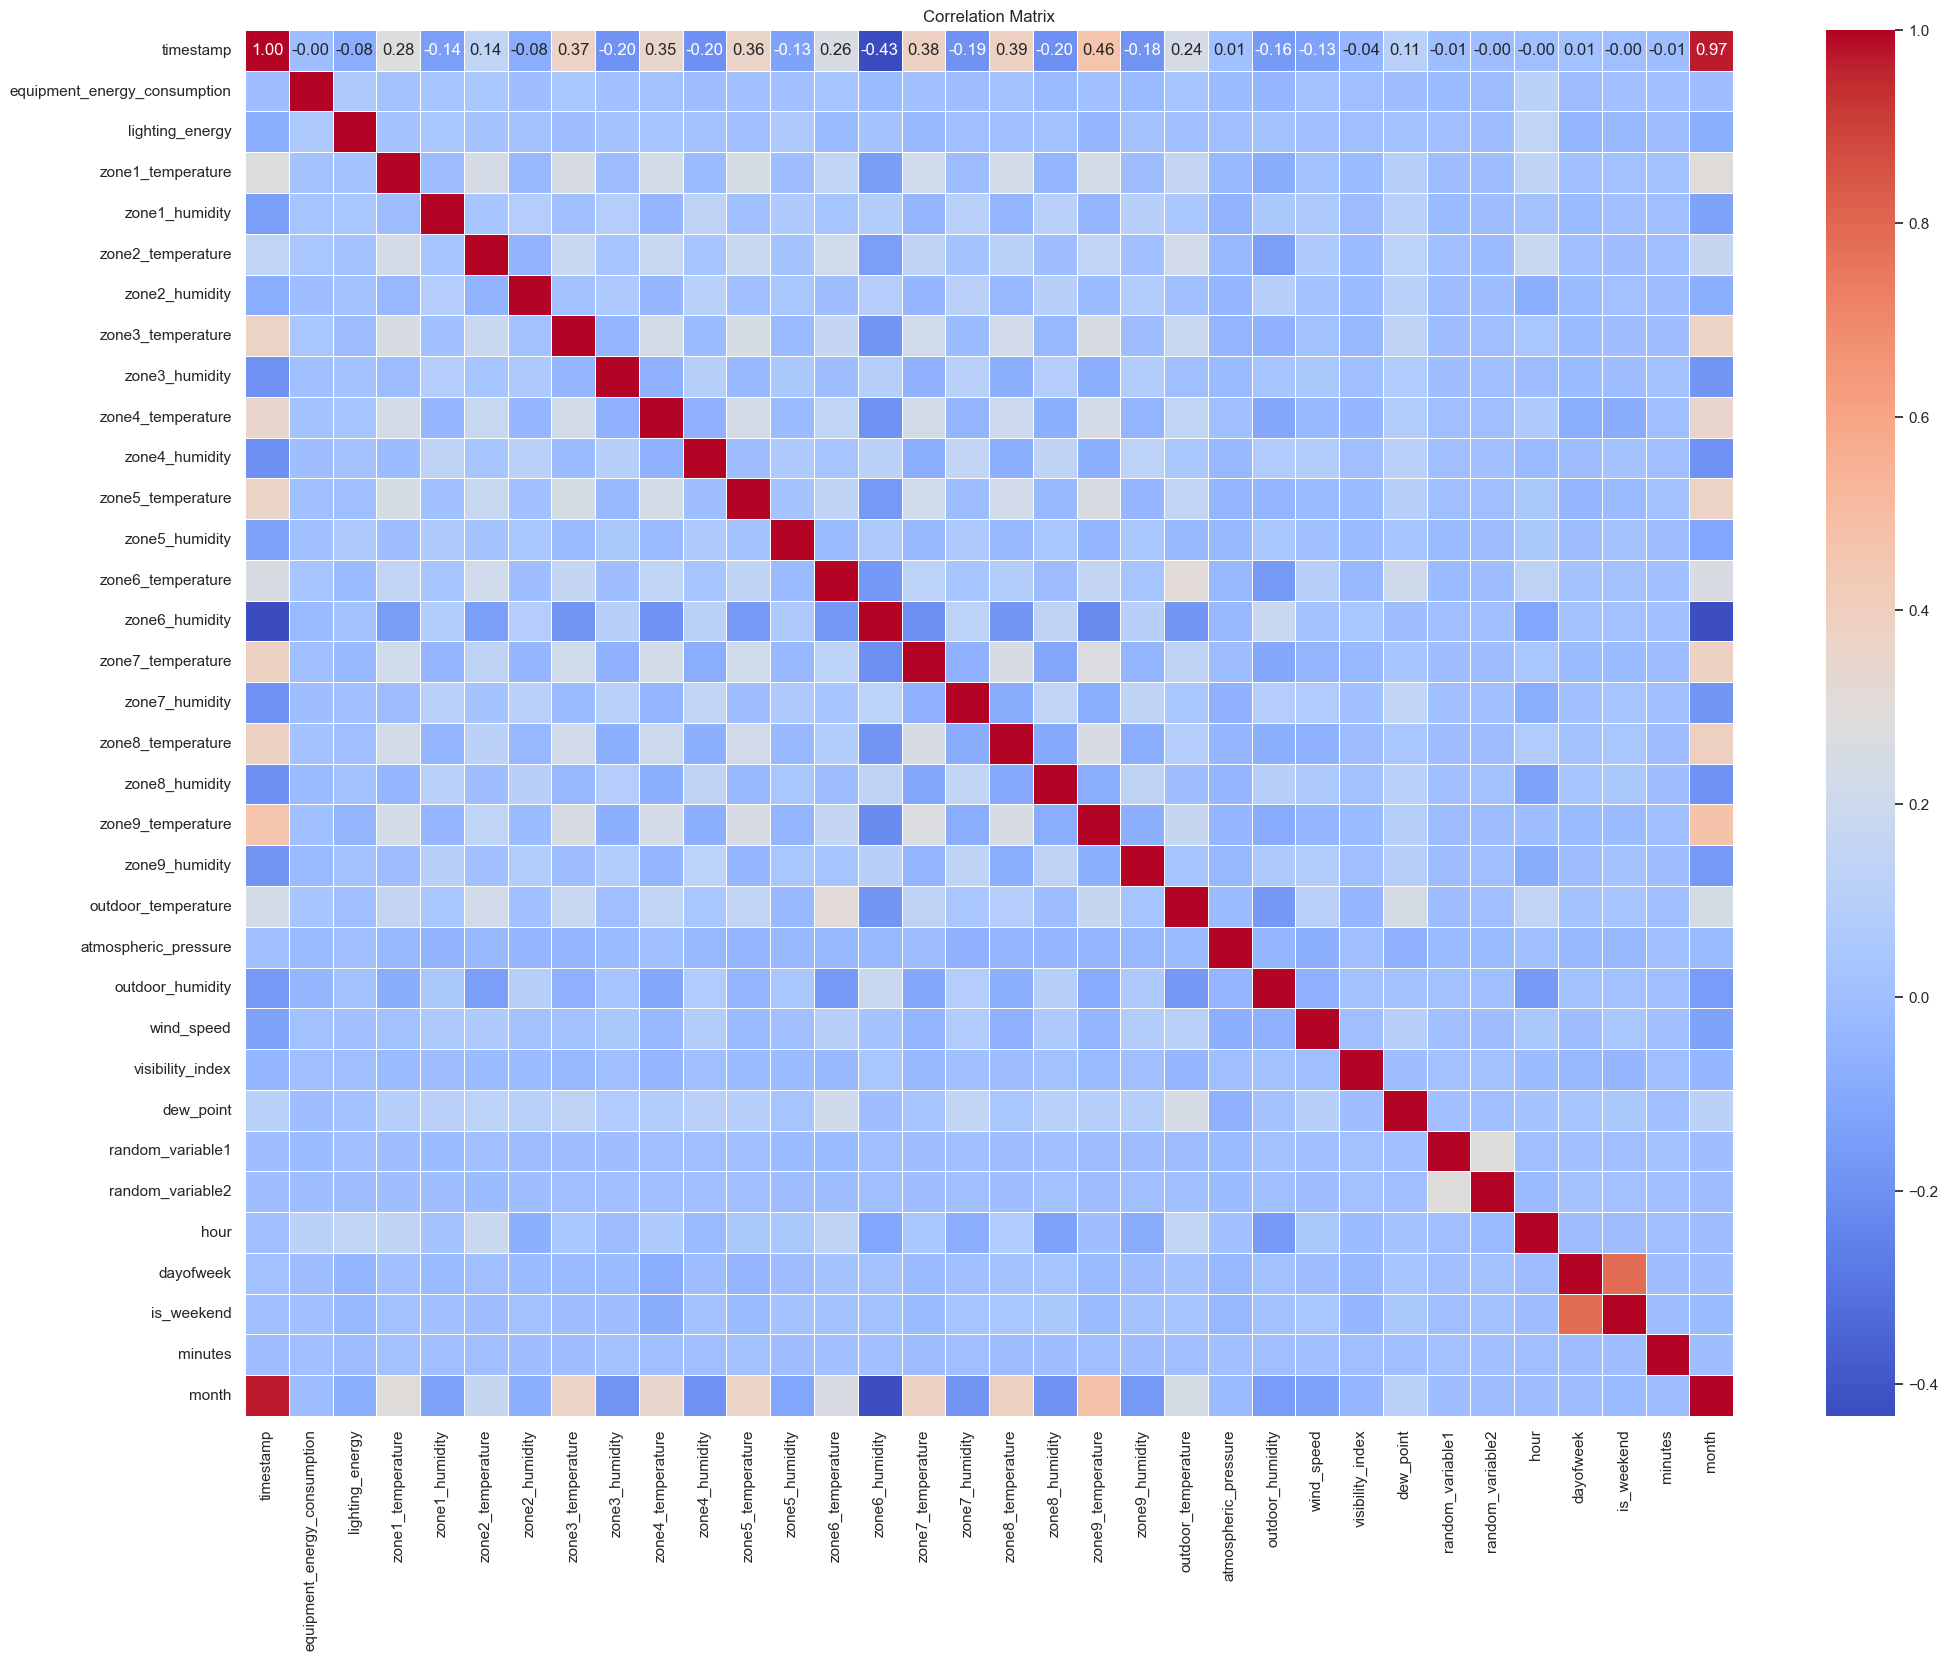

Correlation with target variable (equipment_energy_consumption):
equipment_energy_consumption    1.000000
hour                            0.120745
lighting_energy                 0.057007
zone2_temperature               0.042058
zone3_temperature               0.038033
outdoor_temperature             0.033223
zone6_temperature               0.032136
zone1_humidity                  0.026997
zone8_temperature               0.019716
zone1_temperature               0.018402
zone4_temperature               0.017128
wind_speed                      0.011566
zone5_temperature               0.008938
zone5_humidity                  0.007903
zone7_temperature               0.007255
zone3_humidity                  0.006724
minutes                         0.004878
is_weekend                      0.004207
zone9_temperature               0.003985
visibility_index                0.000022
month                          -0.003137
zone4_humidity                 -0.003232
dew_point                      -0

In [22]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable: equipment_energy_consumption
target_corr = corr_matrix['equipment_energy_consumption'].sort_values(ascending=False)
print("Correlation with target variable (equipment_energy_consumption):")
print(target_corr)


In [23]:
# Check correlation of random variables with the target
random_variables_corr = corr_matrix[['random_variable1', 'random_variable2', 'equipment_energy_consumption']]
print("Correlation of random variables with equipment_energy_consumption:")
print(random_variables_corr)


Correlation of random variables with equipment_energy_consumption:
                              random_variable1  random_variable2  \
timestamp                            -0.006838         -0.004180   
equipment_energy_consumption         -0.016155         -0.011387   
lighting_energy                       0.004137         -0.002771   
zone1_temperature                    -0.004615         -0.004491   
zone1_humidity                       -0.017344         -0.007518   
zone2_temperature                     0.006957         -0.014937   
zone2_humidity                       -0.007897         -0.005875   
zone3_temperature                    -0.012961         -0.000215   
zone3_humidity                       -0.004795          0.006046   
zone4_temperature                     0.001084         -0.000186   
zone4_humidity                       -0.000405          0.003856   
zone5_temperature                     0.002188         -0.000837   
zone5_humidity                       -0.016925   

In [24]:
df['equipment_energy_consumption'].skew()

0.6226928306001959

In [25]:
temp_skewness = df[temperature_columns].skew().sort_values(ascending=False)
humidity_skewness = df[humidity_columns].skew().sort_values(ascending=False)

# Display results
print("Skewness of Temperature Columns:")
print(temp_skewness)

print("\nSkewness of Humidity Columns:")
print(humidity_skewness)
    
    

Skewness of Temperature Columns:
zone2_temperature    0.365043
zone7_temperature    0.224680
zone8_temperature    0.200556
zone6_temperature    0.113976
zone5_temperature    0.064108
zone1_temperature    0.034708
zone9_temperature   -0.103714
zone3_temperature   -0.257828
zone4_temperature   -0.351604
dtype: float64

Skewness of Humidity Columns:
zone6_humidity   -0.124386
zone5_humidity   -1.185781
zone7_humidity   -2.605690
zone8_humidity   -3.009099
zone4_humidity   -3.365544
zone2_humidity   -4.383365
zone9_humidity   -4.407771
zone1_humidity   -4.638634
zone3_humidity   -5.481574
dtype: float64


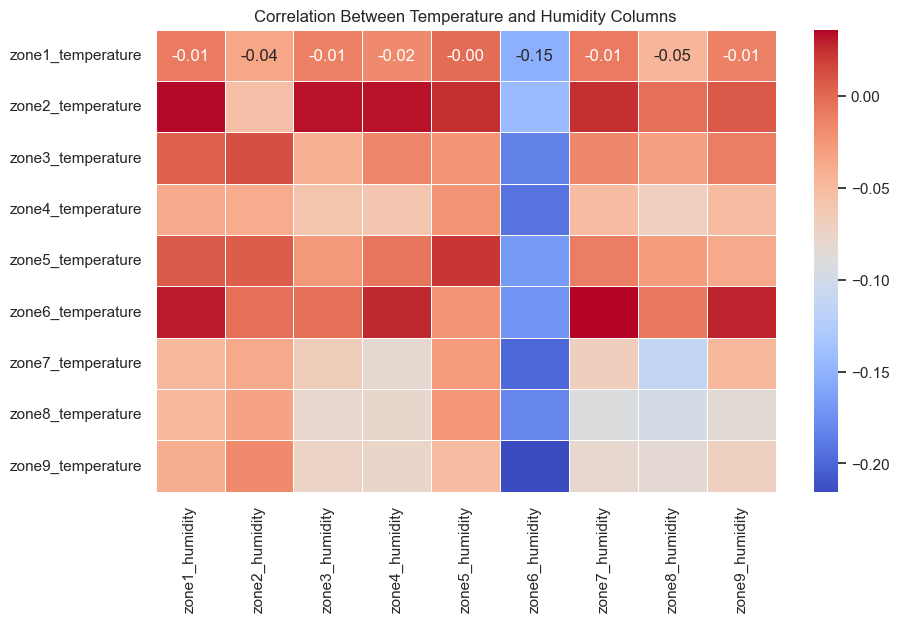

                   zone1_humidity  zone2_humidity  zone3_humidity  \
zone1_temperature       -0.010000       -0.035125       -0.012612   
zone2_temperature        0.034533       -0.054609        0.032676   
zone3_temperature        0.003898        0.011493       -0.042254   
zone4_temperature       -0.036967       -0.038702       -0.058982   
zone5_temperature        0.007077        0.006038       -0.026607   
zone6_temperature        0.030712       -0.004063       -0.003855   
zone7_temperature       -0.048643       -0.036985       -0.067553   
zone8_temperature       -0.049798       -0.032745       -0.079201   
zone9_temperature       -0.040162       -0.017973       -0.074305   

                   zone4_humidity  zone5_humidity  zone6_humidity  \
zone1_temperature       -0.017221       -0.002083       -0.152361   
zone2_temperature        0.032748        0.025247       -0.143208   
zone3_temperature       -0.015302       -0.023426       -0.183544   
zone4_temperature       -0.059857

In [26]:
# Calculate correlation between all variables (including temperature and humidity)
correlation_matrix = df.corr()



# Filter out just temperature and humidity correlations
temp_humidity_corr = correlation_matrix.loc[temperature_columns, humidity_columns]

# Visualize correlation matrix of temperature and humidity
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(temp_humidity_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Temperature and Humidity Columns")
plt.show()
print(temp_humidity_corr)


In [27]:
df['outdoor_temperature'].skew()

0.32212321251306647

In [28]:
df['outdoor_humidity'].skew()

-2.0138922151064778

In [29]:
df['atmospheric_pressure'].skew()

-0.027606538863810183

In [30]:
df['wind_speed'].skew()

0.10792789347333927

In [31]:
df['visibility_index'].skew()

-0.15957760002135593

In [32]:
df['dew_point'].skew()

-0.05459775096550766

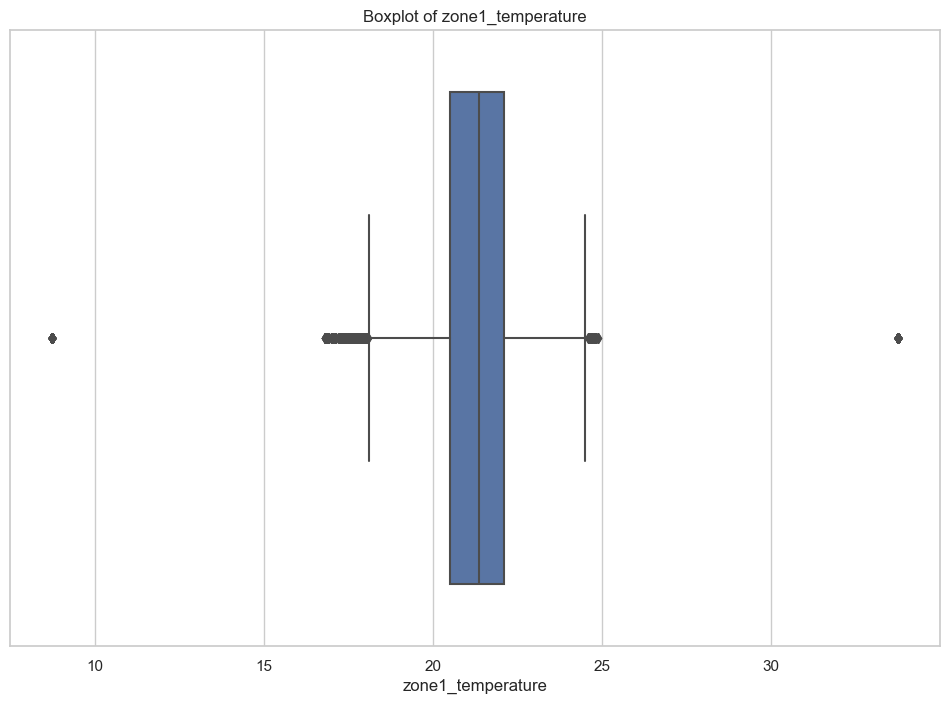

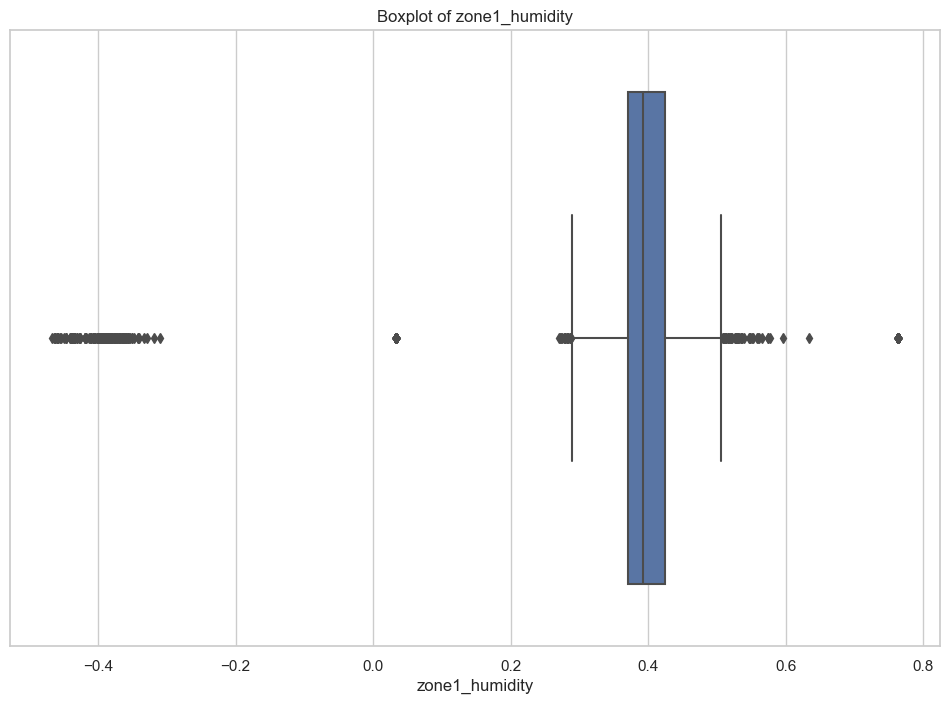

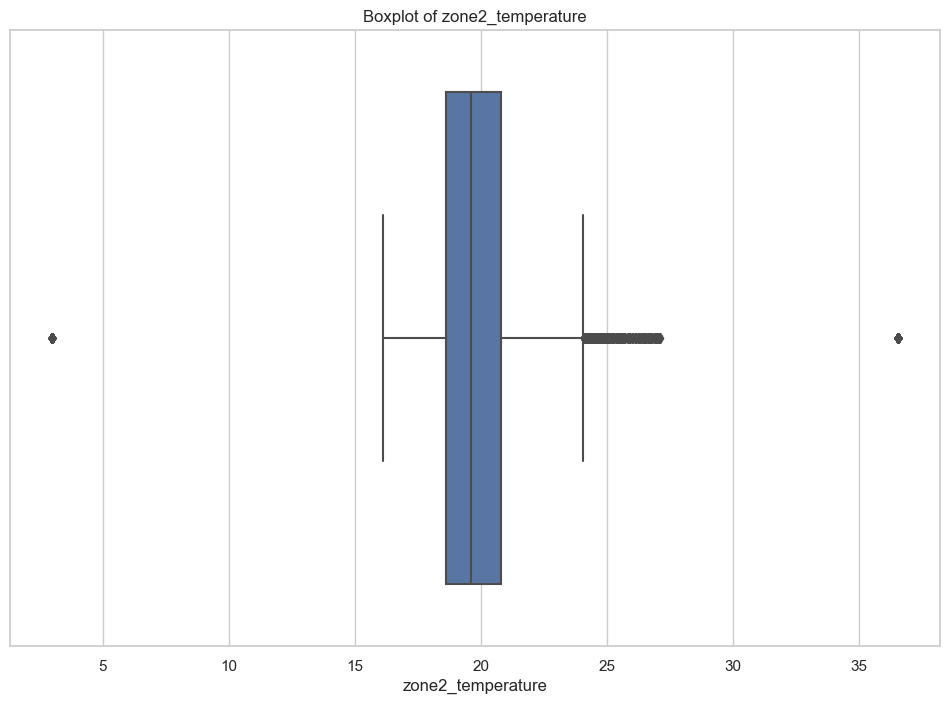

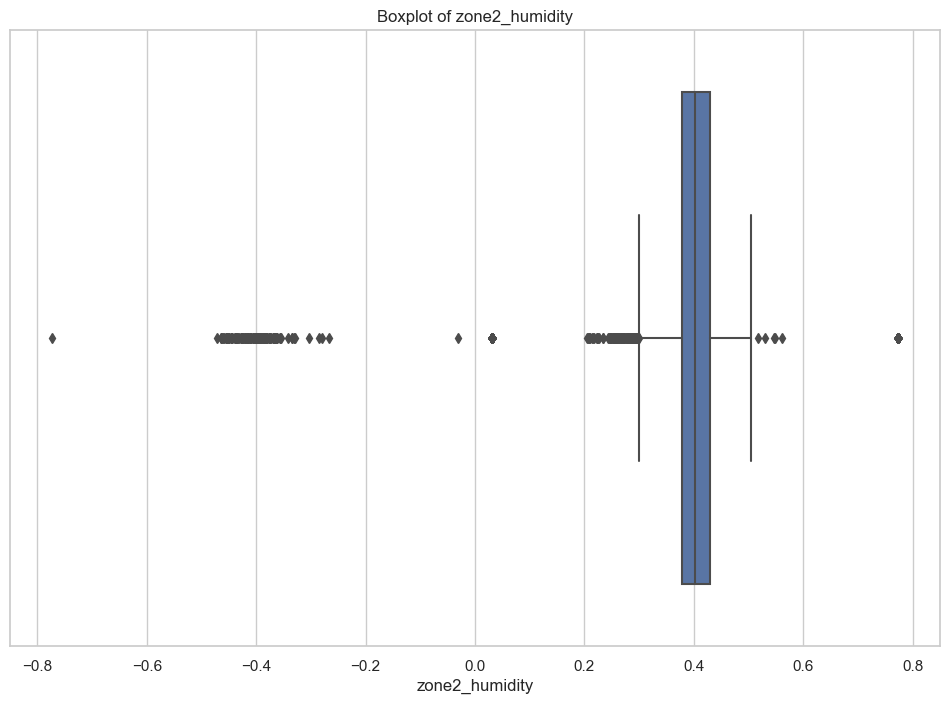

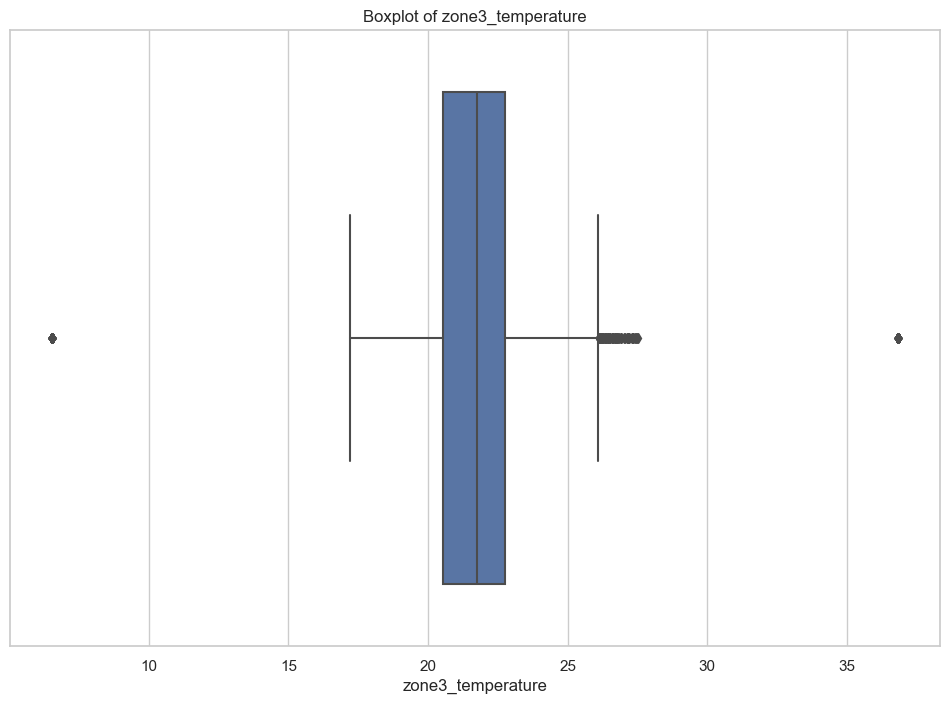

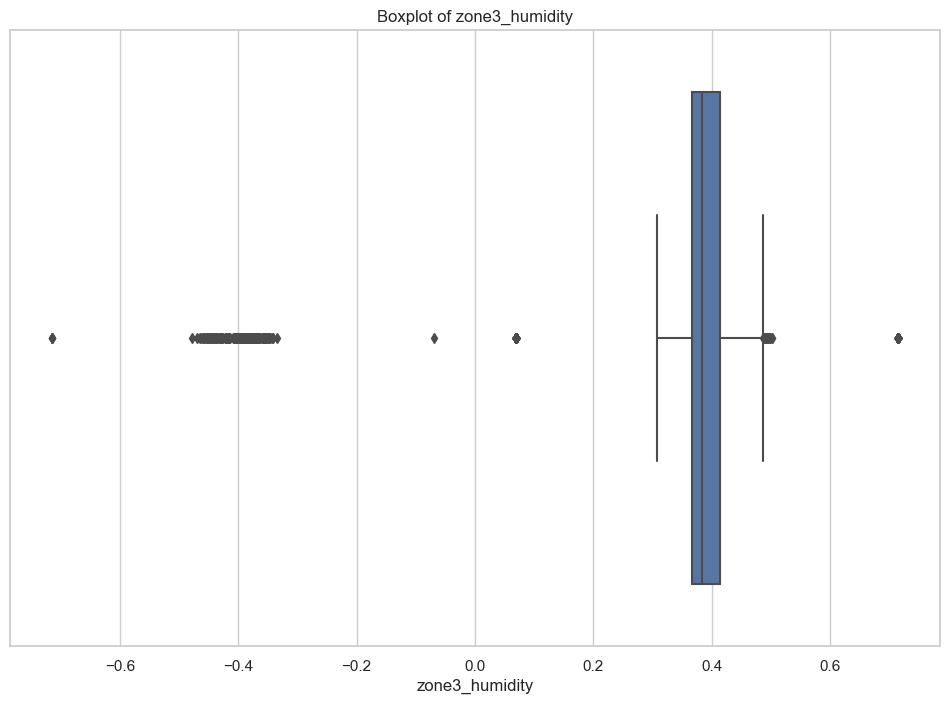

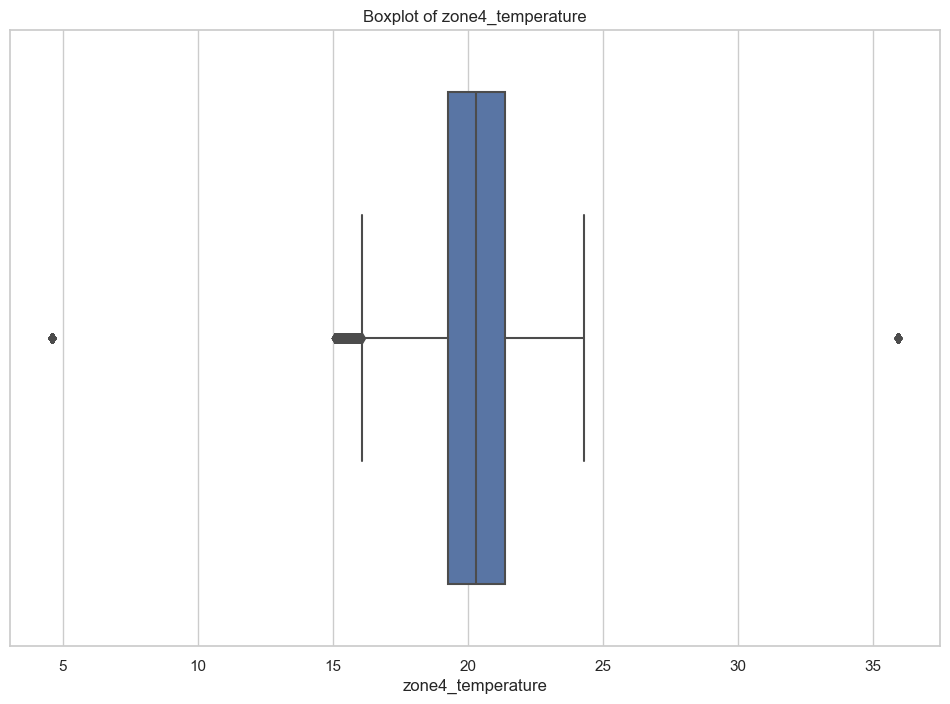

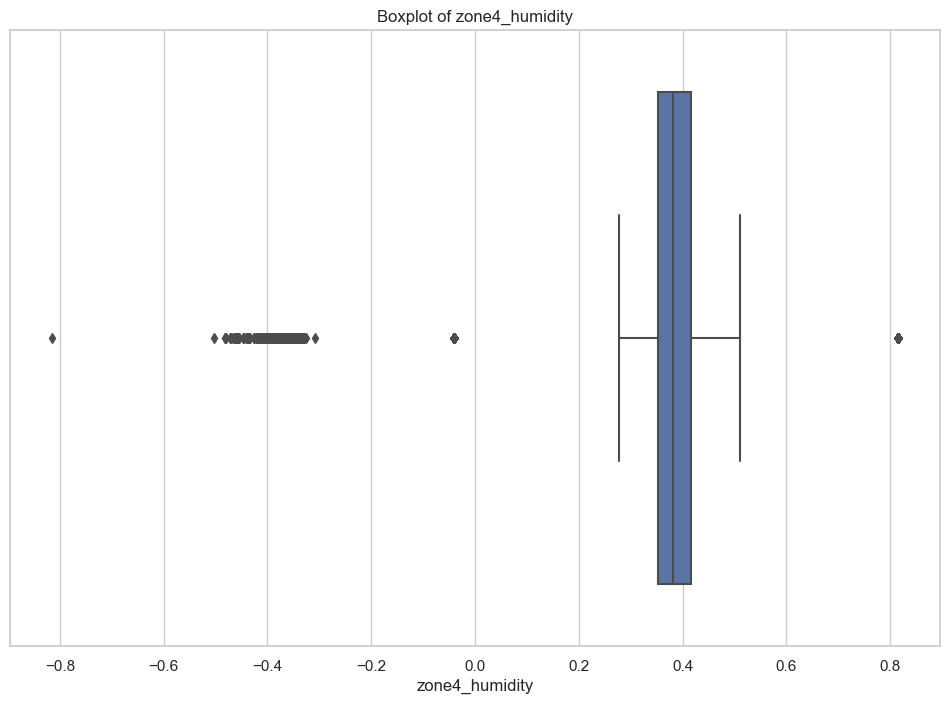

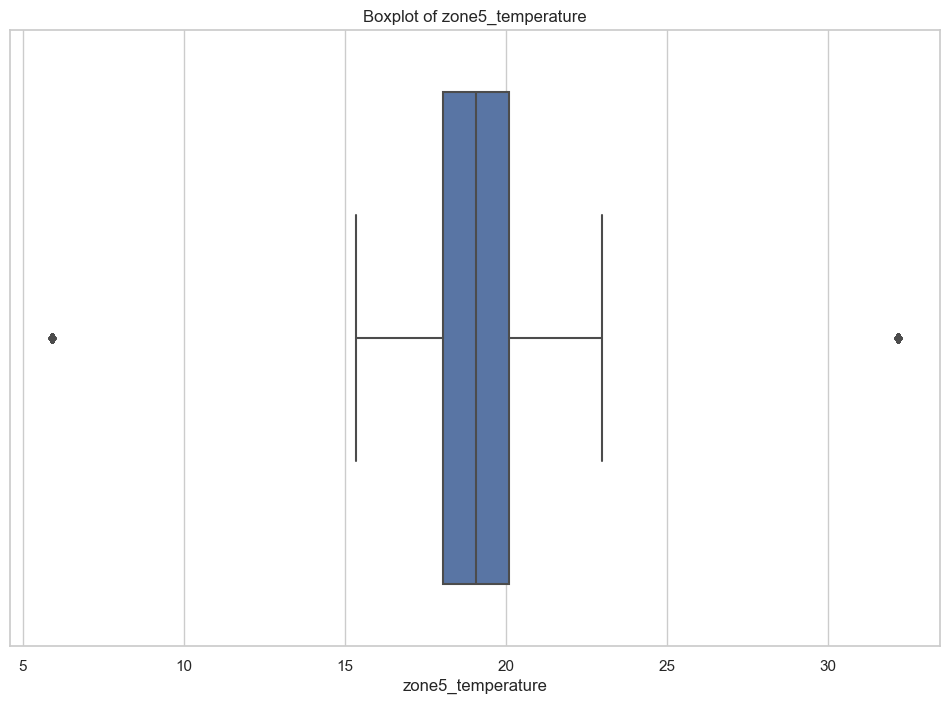

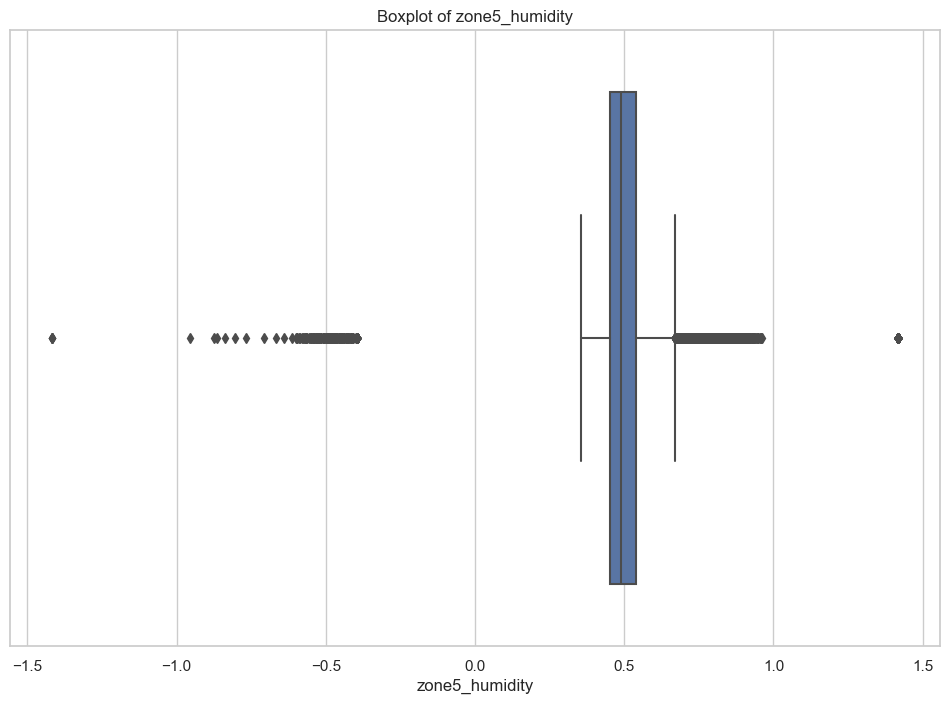

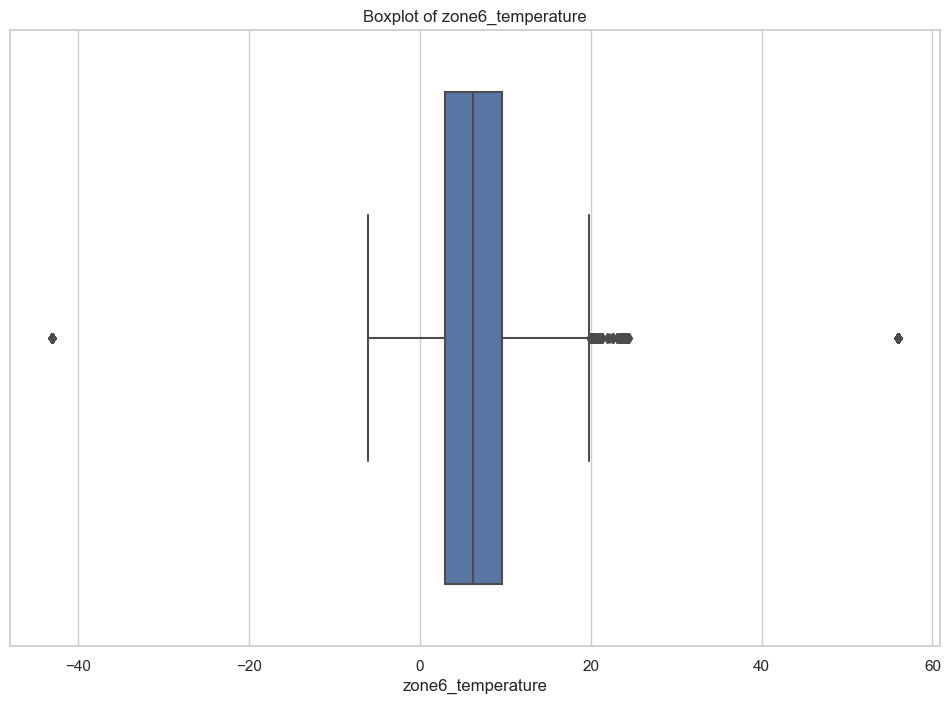

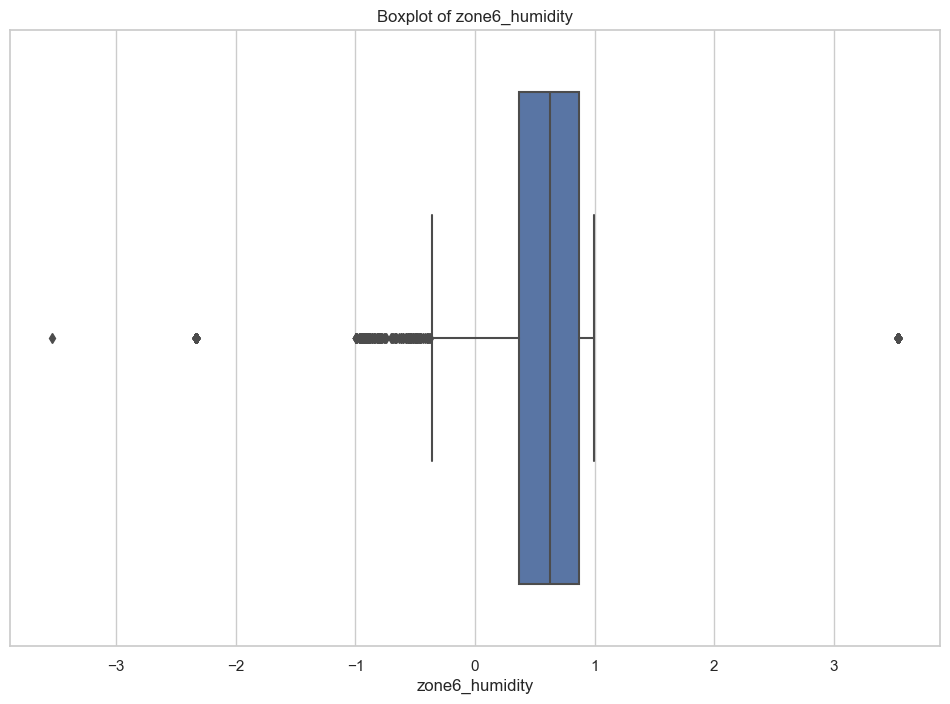

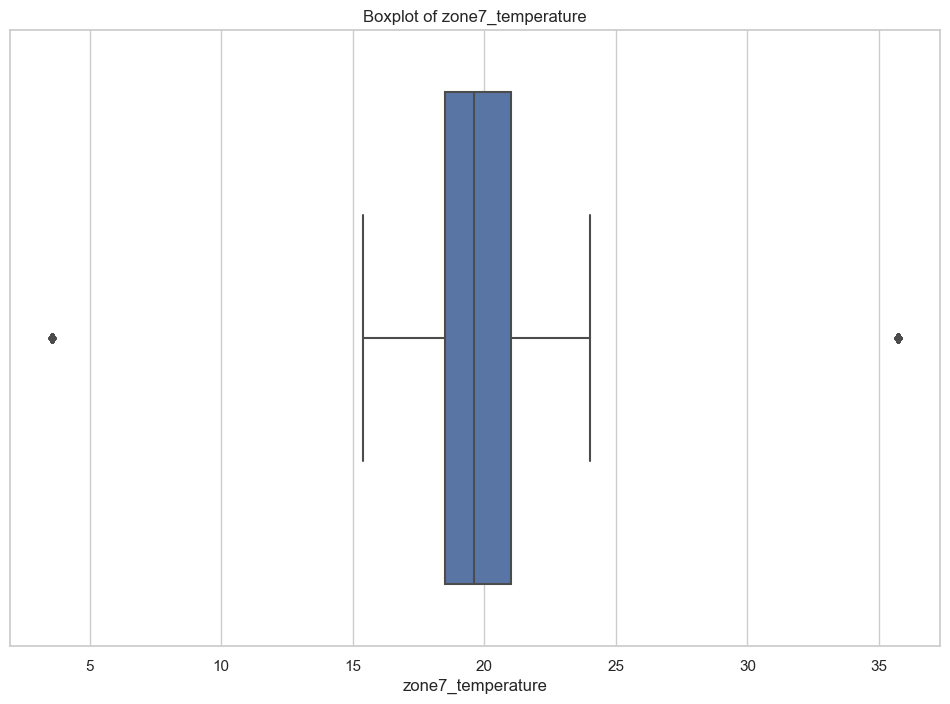

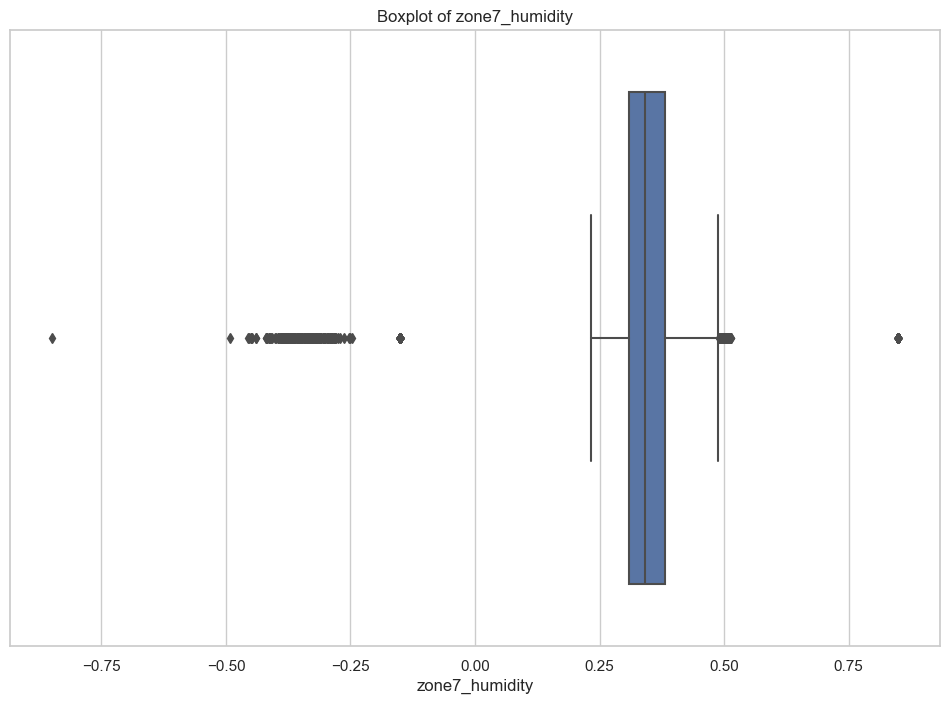

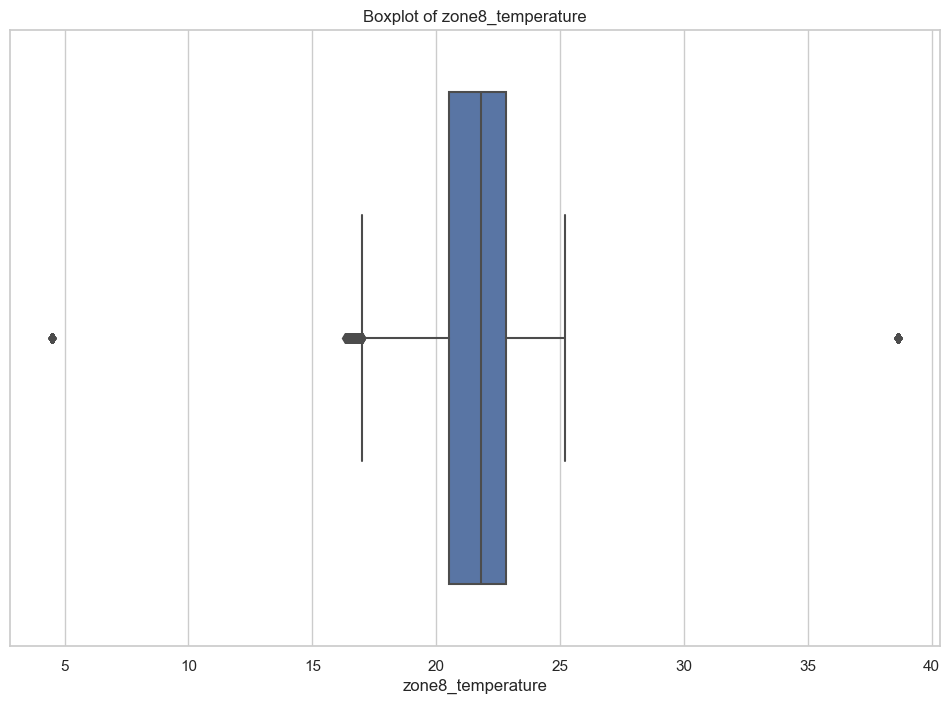

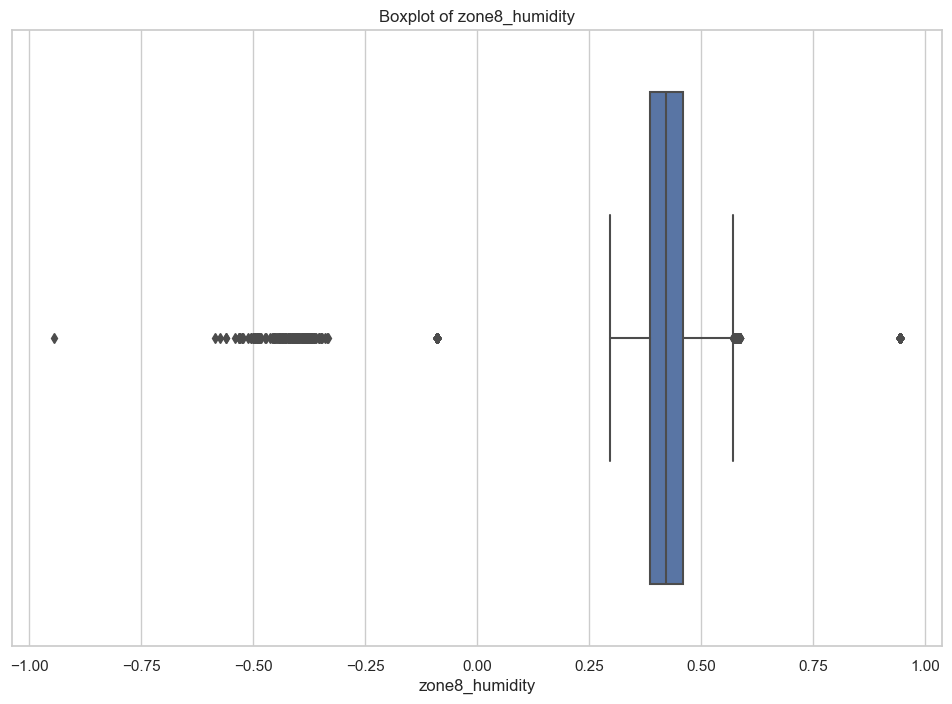

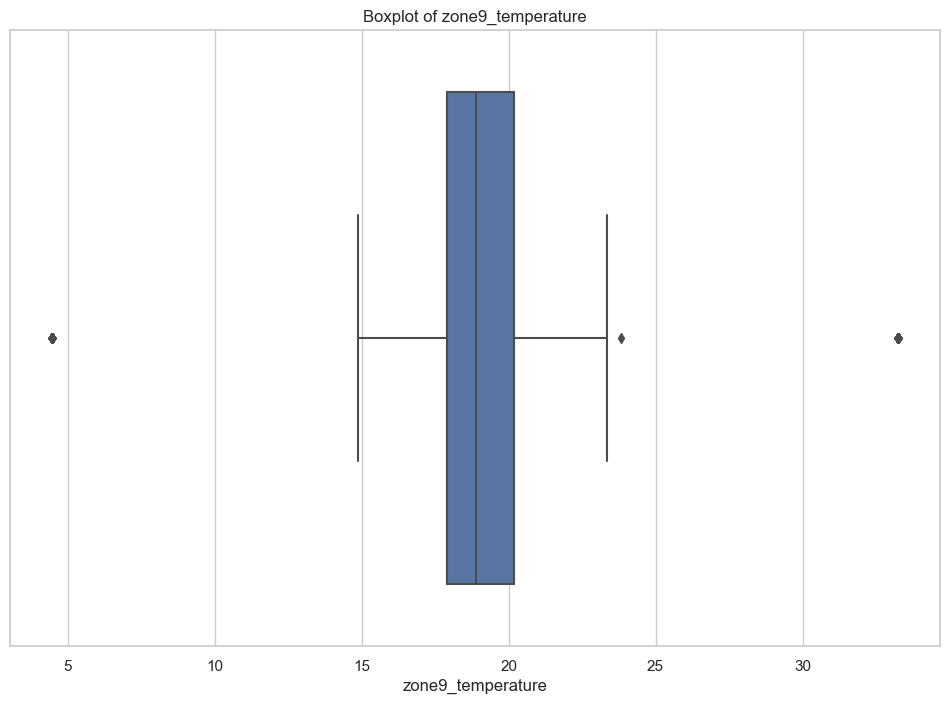

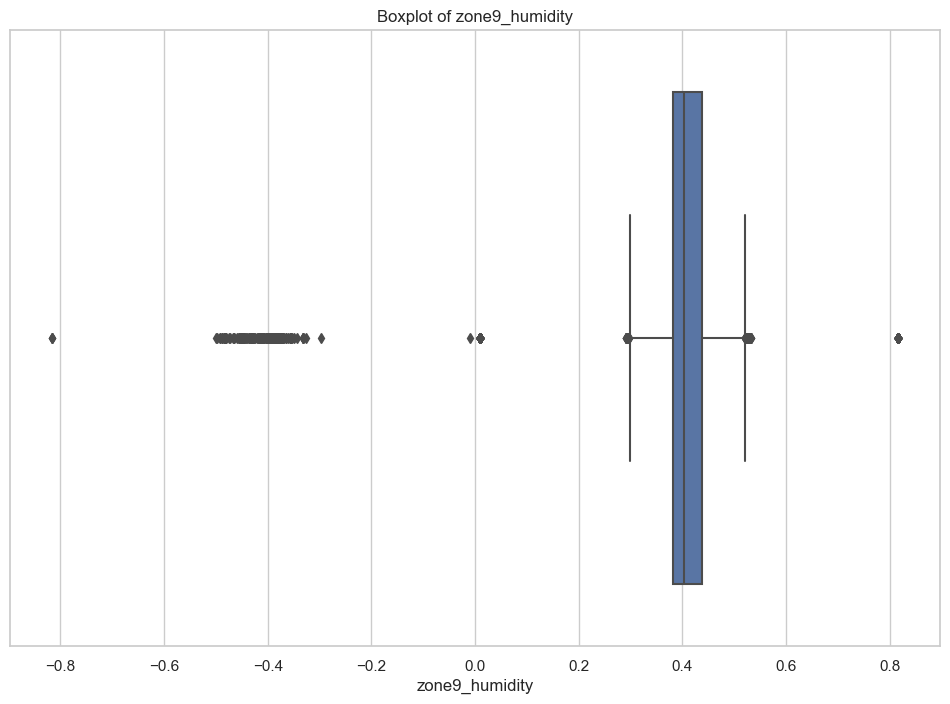

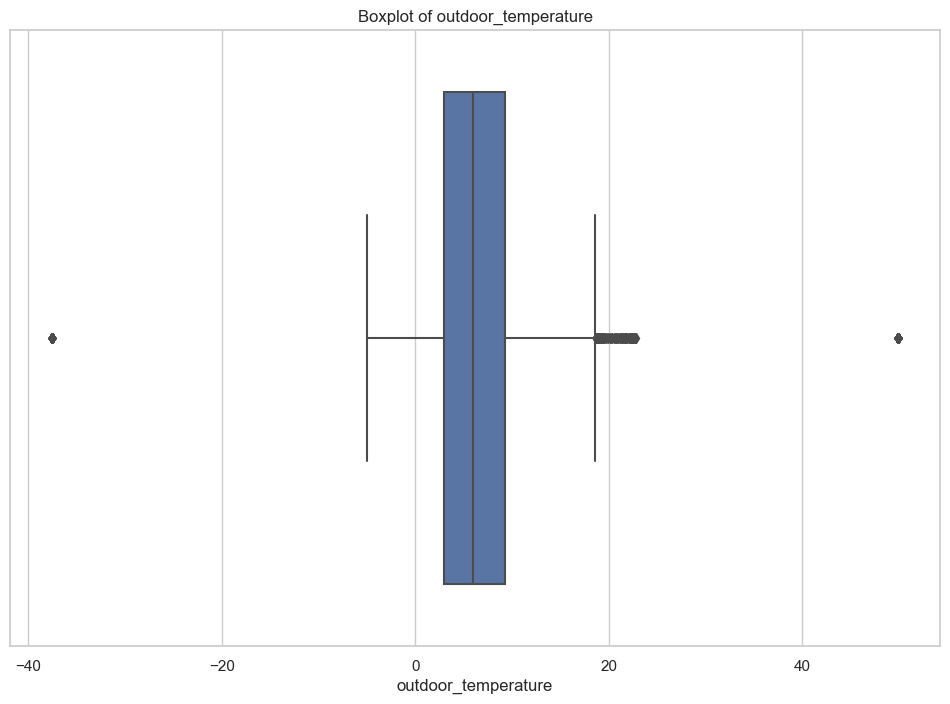

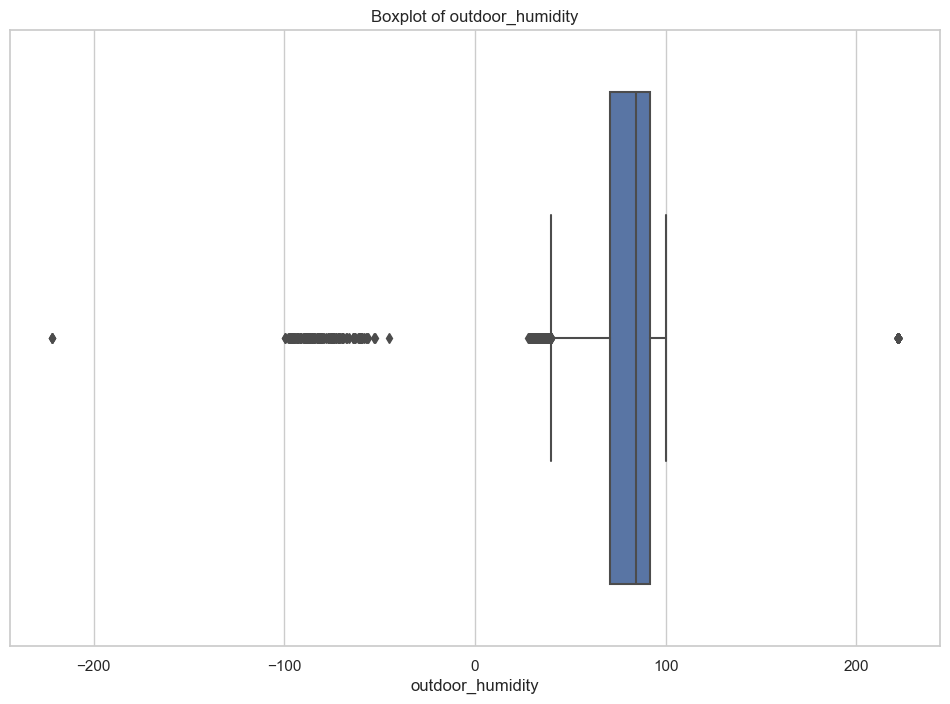

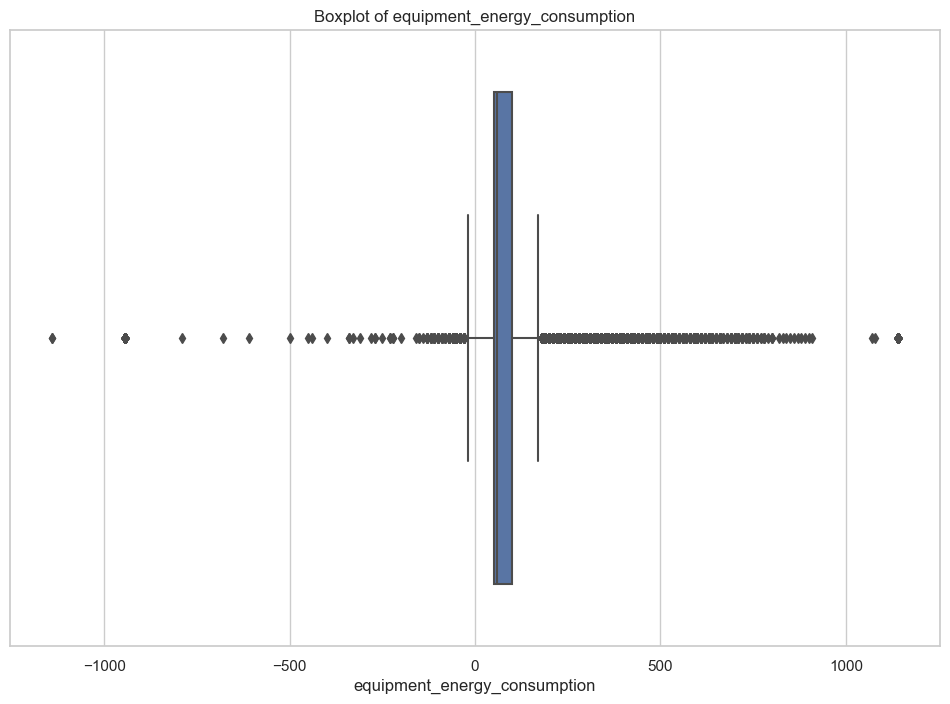

In [33]:


# Combine all temperature and humidity columns into a list
temp_hum_cols = [col for col in df.columns if 'temperature' in col or 'humidity' in col]
temp_hum_cols.append('equipment_energy_consumption')  # include the target

# Plot boxplots
for col in temp_hum_cols:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [34]:
df['equipment_energy_consumption'].describe()

count    15945.000000
mean        95.810413
std        182.753554
min      -1139.985693
25%         50.000000
50%         60.000000
75%        100.000000
max       1139.985693
Name: equipment_energy_consumption, dtype: float64

In [35]:
(df['equipment_energy_consumption'] < 0).sum()/len(df)*100

1.9692693634368141

In [36]:
df = df[df['equipment_energy_consumption']>=0 ]

In [37]:
df['atmospheric_pressure'].describe()

count    14849.000000
mean       755.771476
std         13.695079
min        678.159940
25%        750.800000
50%        756.200000
75%        762.100000
max        833.392675
Name: atmospheric_pressure, dtype: float64

In [38]:
(df['zone6_humidity']<0).sum()

280

In [39]:
humidity_columns = [
    'zone1_humidity', 'zone2_humidity', 'zone3_humidity', 'zone4_humidity', 'zone5_humidity',
    'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity', 'outdoor_humidity',
    
]

# filling NAN values in himidity columns with median as humidity columns are highly skewed
for col in humidity_columns:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 or x > 100 else x)
    df[col].fillna(df[col].median(), inplace=True)


In [40]:
(df['visibility_index']<0).sum()

172

In [41]:
temp_other_columns = [
    'zone1_temperature', 'zone2_temperature', 'zone3_temperature', 'zone4_temperature', 'zone5_temperature',
    'zone6_temperature', 'zone7_temperature', 'zone8_temperature', 'zone9_temperature', 'outdoor_temperature',
    'atmospheric_pressure', 'wind_speed', 'dew_point', 'lighting_energy'
]

# Apply the same logic for all humidity columns
for col in temp_other_columns:
    df[col].fillna(df[col].mean(), inplace=True)
df['visibility_index'] = df['visibility_index'].apply(lambda x: np.nan if x < 0 else x)
df['visibility_index'].fillna(df['visibility_index'].mean(), inplace = True)

In [42]:
df['lighting_energy'].skew()

0.20506864372502676

In [43]:
df['lighting_energy'].describe()

count    15631.000000
mean         3.899077
std         14.243522
min        -86.002966
25%          0.000000
50%          0.000000
75%          3.899077
max         86.002966
Name: lighting_energy, dtype: float64

In [44]:
correlation_with_target = df[['random_variable1', 'random_variable2', 'equipment_energy_consumption']].corr()
print(correlation_with_target)

                              random_variable1  random_variable2  \
random_variable1                      1.000000          0.293363   
random_variable2                      0.293363          1.000000   
equipment_energy_consumption         -0.014635         -0.010407   

                              equipment_energy_consumption  
random_variable1                                 -0.014635  
random_variable2                                 -0.010407  
equipment_energy_consumption                      1.000000  


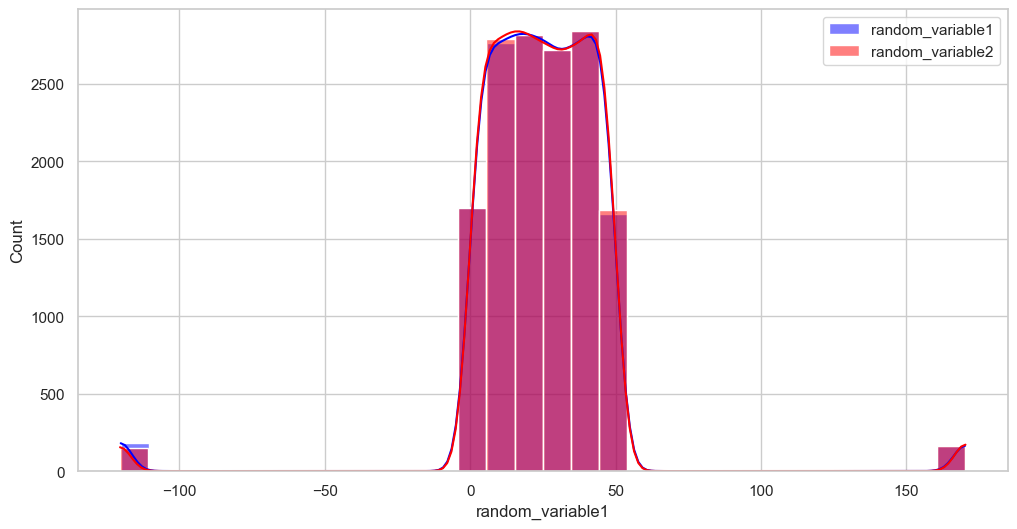

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of random variables
plt.figure(figsize=(12, 6))
sns.histplot(df['random_variable1'], kde=True, bins=30, color='blue', label='random_variable1')
sns.histplot(df['random_variable2'], kde=True, bins=30, color='red', label='random_variable2')
plt.legend()
plt.show()


In [46]:
# checking outlier percentage
def outlier_percentage_iqr(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = len(outliers) / len(df) * 100
        outlier_summary[col] = round(outlier_percentage, 2)
    return pd.Series(outlier_summary).sort_values(ascending=False)


In [47]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('equipment_energy_consumption')  # Exclude target if already cleaned

outlier_percentages = outlier_percentage_iqr(df, numeric_cols)
print(outlier_percentages)


lighting_energy         24.80
visibility_index        14.91
zone5_humidity           7.86
zone1_temperature        4.52
zone2_temperature        3.91
zone4_temperature        3.86
zone2_humidity           3.51
zone6_temperature        3.17
atmospheric_pressure     3.06
zone8_temperature        3.00
zone9_humidity           2.97
outdoor_temperature      2.80
wind_speed               2.71
zone3_temperature        2.65
zone1_humidity           2.48
random_variable1         2.18
zone7_temperature        2.17
zone5_temperature        2.12
dew_point                2.07
random_variable2         2.01
zone3_humidity           2.01
zone9_temperature        2.00
outdoor_humidity         1.94
zone8_humidity           1.60
zone7_humidity           1.38
zone4_humidity           1.32
zone6_humidity           0.99
month                    0.06
hour                     0.00
dayofweek                0.00
is_weekend               0.00
minutes                  0.00
dtype: float64


### capping outliers and trials


In [48]:
def cap_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    """
    Caps outliers in given columns based on the provided percentile range.
    Modifies the DataFrame in place and returns it.
    """
    for col in columns:
        lower = df[col].quantile(lower_percentile)
        upper = df[col].quantile(upper_percentile)
        df[col] = df[col].clip(lower=lower, upper=upper)
    return df


In [49]:
high_outlier_cols = ['lighting_energy', 'visibility_index']
df = cap_outliers(df, high_outlier_cols, 0.10, 0.90)


In [50]:
# Features with >2% outliers
features_to_cap = [
    'zone5_humidity', 'zone1_temperature',
    'zone2_temperature', 'zone4_temperature', 'zone2_humidity', 'zone6_temperature',
    'atmospheric_pressure', 'zone8_temperature', 'zone9_humidity', 'outdoor_temperature',
    'wind_speed', 'zone3_temperature', 'zone1_humidity', 'random_variable1',
    'zone7_temperature', 'zone5_temperature', 'dew_point', 'random_variable2',
    'zone3_humidity', 'zone9_temperature', 'outdoor_humidity'
]

# Apply capping to those
df = cap_outliers(df, features_to_cap, 0.05, 0.95)


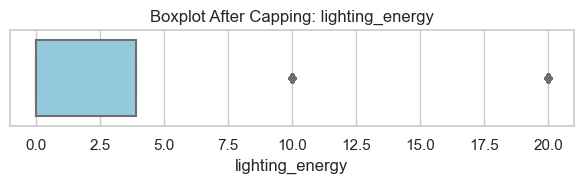

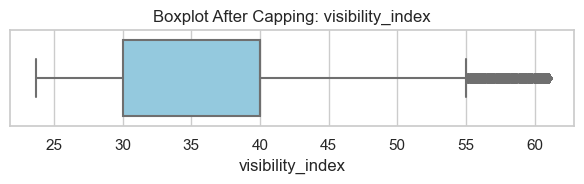

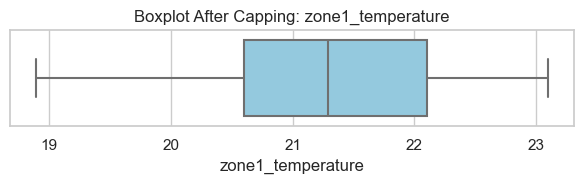

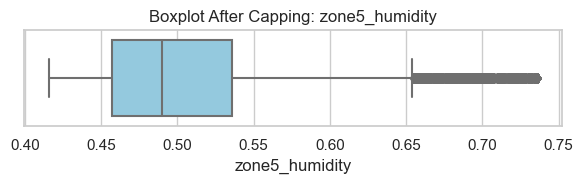

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# List a few columns to check visually
columns_to_check = ['lighting_energy', 'visibility_index', 'zone1_temperature', 'zone5_humidity']

# Plot boxplots
for col in columns_to_check:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot After Capping: {col}')
    plt.tight_layout()
    plt.show()


In [52]:
# IQR method to recalculate % outliers
def calculate_outlier_percentage(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return round((len(outliers) / len(df)) * 100, 2)

# Check a few columns
for col in ['lighting_energy', 'visibility_index', 'zone1_temperature']:
    pct = calculate_outlier_percentage(df, col)
    print(f'{col}: {pct}% outliers after capping')


lighting_energy: 23.42% outliers after capping
visibility_index: 14.0% outliers after capping
zone1_temperature: 0.0% outliers after capping


<Axes: xlabel='visibility_index', ylabel='Count'>

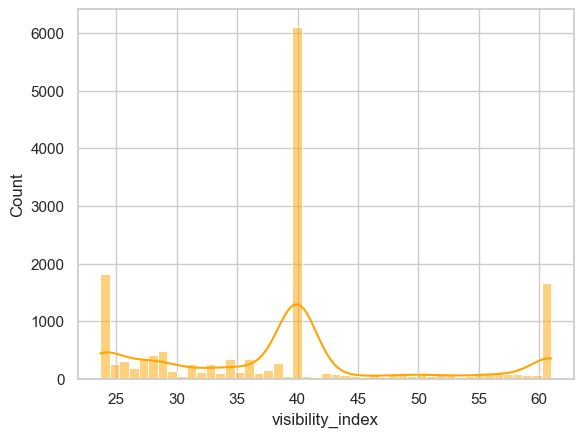

In [53]:
sns.histplot(df['visibility_index'],kde = True,color= 'orange')


<Axes: xlabel='lighting_energy', ylabel='Count'>

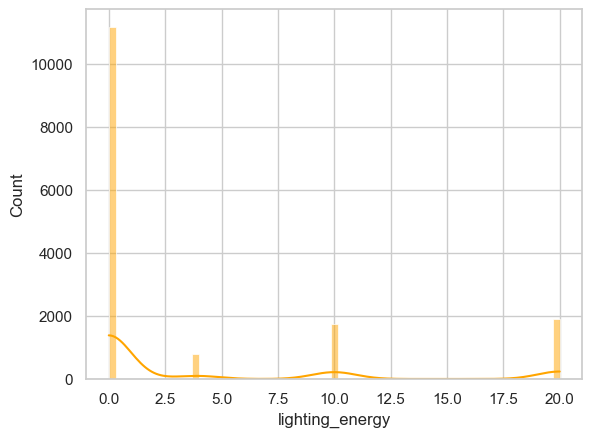

In [54]:
sns.histplot(df['lighting_energy'],kde = True,color= 'orange')

In [55]:
df['random_variable2'].fillna(df['random_variable2'].mean(), inplace=True)
df['random_variable1'].fillna(df['random_variable1'].mean(), inplace=True)

In [56]:
df['average_zone_temp'] = df[['zone1_temperature','zone2_temperature','zone3_temperature','zone4_temperature','zone5_temperature','zone6_temperature',
                             'zone7_temperature','zone8_temperature','zone9_temperature']].mean(axis=1)

In [57]:
df['outdoor_humidity_interaction'] = df['outdoor_temperature'] * df['outdoor_humidity']

In [58]:
df['avg_humidity'] = df[['zone1_humidity','zone2_humidity','zone3_humidity','zone4_humidity','zone5_humidity','zone6_humidity',
                        'zone7_humidity','zone8_humidity','zone9_humidity']].mean(axis=1)

In [59]:
df['zone_temp_zone_humidity'] = df['avg_humidity'] * df['average_zone_temp']

## preparing data for model building

### since its a time-series based data and energy consumption is also varying with time, we will create new features like lag and roll for target variable to correctly predict on the basis of past trends.

In [60]:
df_sorted = df.sort_values(by=['month', 'dayofweek', 'hour', 'minutes']).reset_index(drop=True)


In [61]:

for lag in range(1, 4):
    df_sorted[f'lag_{lag}'] = df_sorted['equipment_energy_consumption'].shift(lag)

df_sorted.dropna(inplace=True)

In [62]:
df_sorted['rolling_mean_3'] = df_sorted['equipment_energy_consumption'].rolling(window=3).mean()
df_sorted['rolling_std_3'] = df_sorted['equipment_energy_consumption'].rolling(window=3).std()
df_sorted.dropna(inplace=True)


In [63]:
features = df_sorted.drop(columns=['equipment_energy_consumption','timestamp'])



target = df_sorted['equipment_energy_consumption']

# Versions with and without random variables
X_with_random =features.copy()
X_without_random =features.drop(columns=['random_variable1', 'random_variable2'])


## * random_variable1 and random_variable2 are not directly correlated with energy consumption but all other columns also showing weak correlation with target column. we are going to build two models one with random variables and other without them to see if they have a impact on target column or not.*

In [64]:
from sklearn.model_selection import train_test_split

# With random variables
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_with_random, target, test_size=0.2, random_state=42)

# Without random variables
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(
    X_without_random, target, test_size=0.2, random_state=42)


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, name='Model'):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))

# With random variables
rf_w = RandomForestRegressor(n_estimators= 100,random_state=42)
evaluate_model(rf_w, X_train_w, X_test_w, y_train_w, y_test_w, "Random Forest (With Random Vars)")

# Without random variables
rf_wo = RandomForestRegressor(n_estimators = 100 , random_state=42)
evaluate_model(rf_wo, X_train_wo, X_test_wo, y_train_wo, y_test_wo, "Random Forest (Without Random Vars)")



Random Forest (With Random Vars)
MAE: 6.989373082620081
RMSE: 24.00583022423151
R²: 0.9727364547228596

Random Forest (Without Random Vars)
MAE: 6.897241649027595
RMSE: 24.22300948686086
R²: 0.9722409200621774


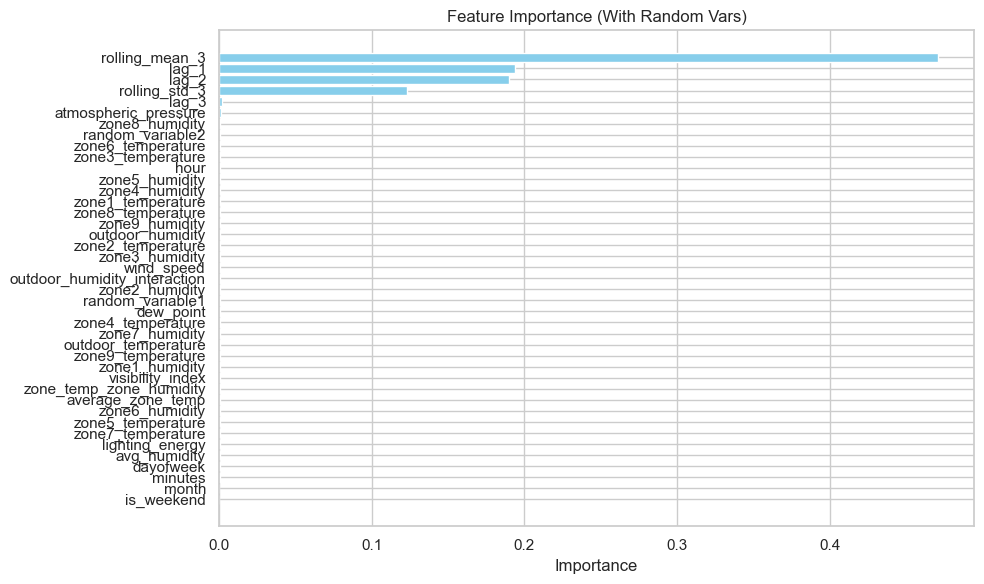

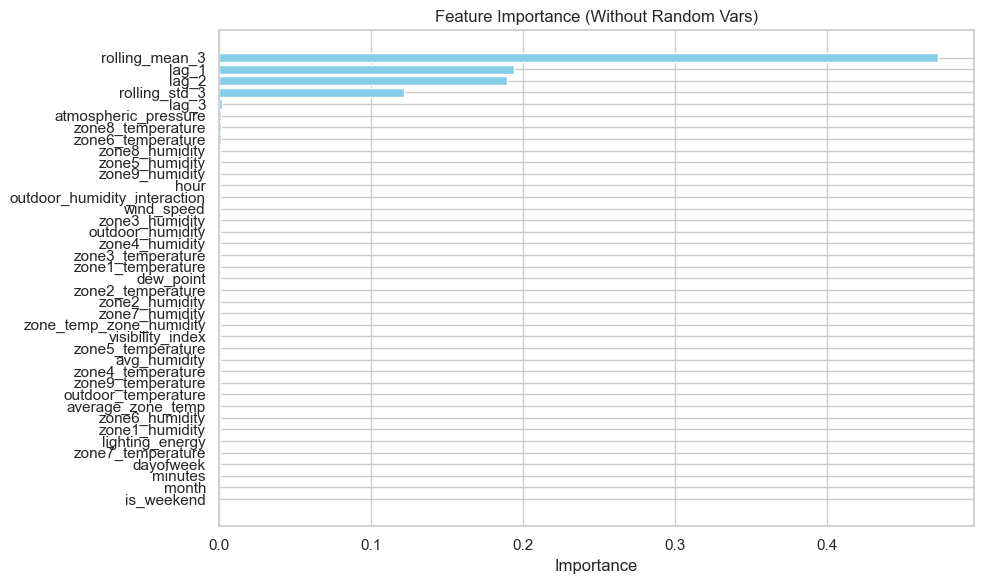

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importance(model, feature_names, title='Feature Importance'):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot feature importance for the model with random variables
plot_feature_importance(rf_w, X_train_w.columns, 'Feature Importance (With Random Vars)')

# Plot feature importance for the model without random variables
plot_feature_importance(rf_wo, X_train_wo.columns, 'Feature Importance (Without Random Vars)')


- performance of random forest regressor model is increasing slightly without random variables. so we should not consider those columns for model deployment

In [67]:

feature_importances = rf_wo.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_wo.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
37                rolling_mean_3    0.472858
34                         lag_1    0.193817
35                         lag_2    0.189553
38                 rolling_std_3    0.121536
36                         lag_3    0.001736
20          atmospheric_pressure    0.001397
15             zone8_temperature    0.000897
11             zone6_temperature    0.000864
16                zone8_humidity    0.000846
10                zone5_humidity    0.000840
18                zone9_humidity    0.000825
25                          hour    0.000773
31  outdoor_humidity_interaction    0.000748
22                    wind_speed    0.000745
6                 zone3_humidity    0.000713
21              outdoor_humidity    0.000707
8                 zone4_humidity    0.000699
5              zone3_temperature    0.000696
1              zone1_temperature    0.000670
24                     dew_point    0.000637
3              zone2_temperature    0.000633
4         

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def scale_and_evaluate(X_train, X_test, y_train, y_test, name='Model'):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)

# With random variables
scale_and_evaluate(X_train_w, X_test_w, y_train_w, y_test_w, "Linear Regression (With Random Vars)")

# Without random variables
scale_and_evaluate(X_train_wo, X_test_wo, y_train_wo, y_test_wo, "Linear Regression (Without Random Vars)")



Linear Regression (With Random Vars)
MAE: 2.3774769030570515e-13
RMSE: 3.1484072473314935e-13
R²: 1.0

Linear Regression (Without Random Vars)
MAE: 2.2115699475767905e-13
RMSE: 3.1290120037521607e-13
R²: 1.0


In [69]:
from xgboost import XGBRegressor

# Define and train the XGBoost model
xgb = XGBRegressor(tree_method='hist', random_state=42)
xgb.fit(X_train_wo, y_train_wo)

# Evaluate the model
evaluate_model(
    model=xgb,
    X_train=X_train_wo,
    y_train=y_train_wo,
    X_test=X_test_wo,
    y_test=y_test_wo,
    name="XGBoost"
)



XGBoost
MAE: 6.880732456321858
RMSE: 22.116692751317213
R²: 0.9768586208249965


In [70]:

feature_importances = xgb.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_wo.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
37                rolling_mean_3    0.412934
35                         lag_2    0.286804
34                         lag_1    0.183599
38                 rolling_std_3    0.052557
16                zone8_humidity    0.010006
23              visibility_index    0.006255
11             zone6_temperature    0.005327
36                         lag_3    0.003920
19           outdoor_temperature    0.003594
6                 zone3_humidity    0.003257
18                zone9_humidity    0.002427
17             zone9_temperature    0.001999
1              zone1_temperature    0.001977
22                    wind_speed    0.001859
3              zone2_temperature    0.001636
2                 zone1_humidity    0.001545
25                          hour    0.001475
32                  avg_humidity    0.001376
14                zone7_humidity    0.001254
20          atmospheric_pressure    0.001156
15             zone8_temperature    0.001138
7         

## conclusions
- random variables are just noisy data, contributing nothing for the model building.
- lag and rolling features are the most important features.
- linear regression model is giving perfect r2 score but it might be due to overfitting.
- xg boost and random forest regressor is performing very well, xg boost is slightly better.

  